# Лабораторная работа №4 
## Выделение контуров на изображениях
**Выполнил**: Музыка Артем

5 вариант

### 0. Функция свертки

In [10]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def convolution(image: np.ndarray, core: np.ndarray) -> np.ndarray:
    core = np.rot90(core, k=2, axes=(1,0))
      
    core_height, core_width = core.shape
    height = image.shape[0]
    width = image.shape[1]

    
    if core_height % 2 == 0:
        base_height = height + (core_height // 2)
    else:
        base_height = height + 2*(core_height // 2)
         
    if core_width % 2 == 0:
        base_width = width + (core_width // 2)
    else:
        base_width = width + 2*(core_width // 2)

        
    cenre = (core_height//2, core_width//2)
    base_size = (base_height, base_width)
    
    base_size = height + 2*cenre[0], width + 2*cenre[1]
    new_img = np.zeros(base_size, dtype=np.int32)
    new_img[cenre[0]: height + cenre[0], cenre[1]: width + cenre[1]] = image
    
    img_height, img_width = new_img.shape
    img_filter = np.array(new_img.copy())
    
    for i in range(img_height - core_height):
        for j in range(img_width - core_width):
            frame = new_img[i: i + core_height, j: j + core_width]
            img_filter[i, j] = np.sum(core * frame)
    
    return img_filter[cenre[0]: height + cenre[0], cenre[1]: width + cenre[1]]


### 1. Считать цветное RGB изображение. Преобразовать в градации серого

In [12]:
img = imread('house.jpg')

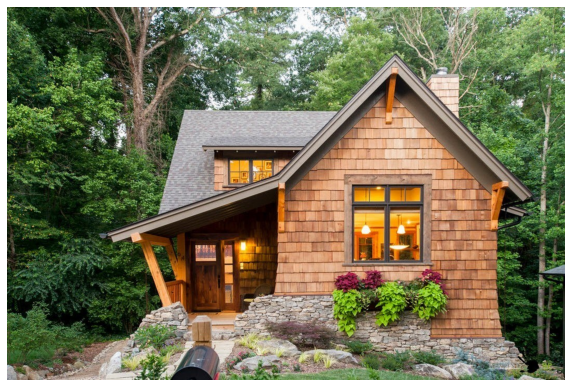

In [13]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(img)
plt.show()

In [14]:
def decomp(img):
    return (img[:,:,2], img[:,:,1], img[:,:,0])

def grayscale(img):
    R, G, B = decomp(img)
    gray = R*0.2989 + G*0.587 + B*0.114
    return gray.astype('uint8')

In [15]:
img = grayscale(img)

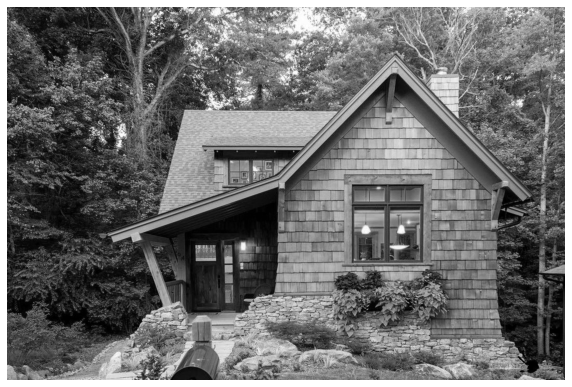

In [16]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(img, cmap='gray')
plt.show()

### 2. Сделать выделение контуров методом простого градиента. модуль градиента аппроксимируется суммой модулей производных.

In [17]:
core_x = np.array([[-1, 1]])
core_y = np.array([[-1], [1]])

In [18]:
gradient_x = convolution(img, core_x)
gradient_y = convolution(img, core_y)

In [19]:
gradient = abs(gradient_x) + abs(gradient_y)

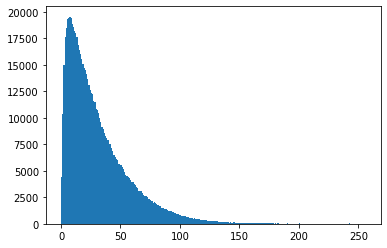

In [20]:
plt.hist(gradient.ravel(), 256, [0, 256])
plt.show()

In [21]:
gradient_step = np.zeros(gradient.shape)
gradient_step[gradient > 10] = 1

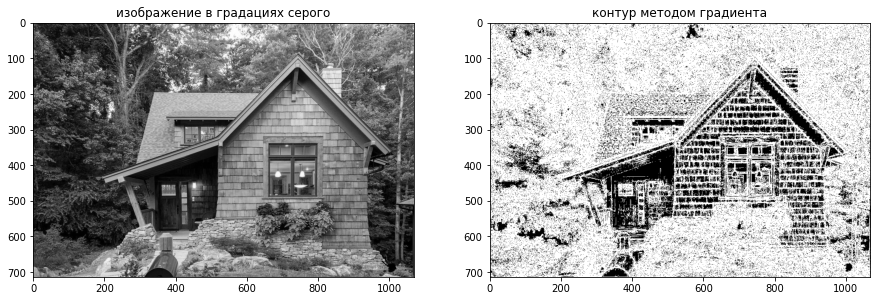

In [22]:
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title("изображение в градациях серого")
plt.imshow(img, cmap='gray')


plt.subplot(1, 2, 2)
plt.title("контур методом градиента")
plt.imshow(gradient_step, cmap='gray')
plt.show()

### 3. Сделать выделение контуров. Оператр Роберта

In [23]:
core_s_x = np.array([[-1, 0], [0, 1]])
core_s_y = np.array([[0, 1], [1, 0]])

gradient_s_x = convolution(img, core_s_x)
gradient_s_y = convolution(img, core_s_y)

In [26]:
robert = np.sqrt(gradient_s_x**2 + gradient_s_y**2).astype(np.uint8)

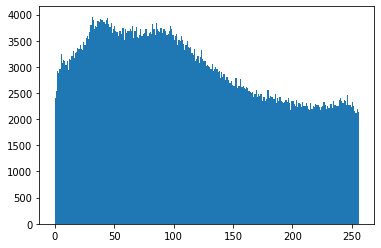

In [27]:
plt.hist(robert.ravel(), 256, [0, 256])
plt.show()

In [28]:
img_sobel_step = np.zeros(robert.shape)
img_sobel_step[robert > 20] = 1

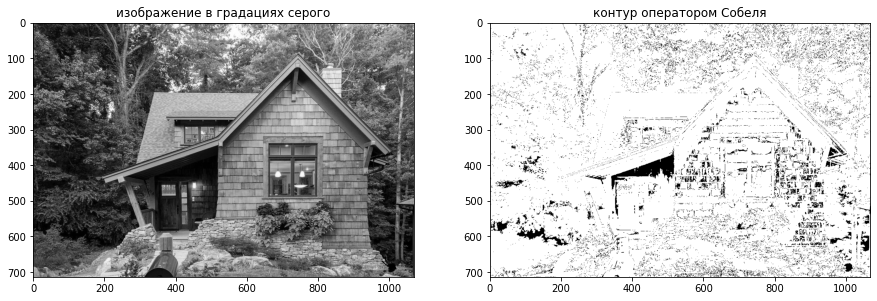

In [29]:
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title("изображение в градациях серого")
plt.imshow(img, cmap='gray')


plt.subplot(1, 2, 2)
plt.title("контур оператором Собеля")
plt.imshow(img_sobel_step, cmap='gray')
plt.show()

### 4. Сделать выделение контуров методом с согласованием

In [30]:
core = 1/3 * np.array([[2, -1, 2], [-1, -4, -1], [2, -1, 2]])

In [31]:
img_lap = abs(convolution(img, core))

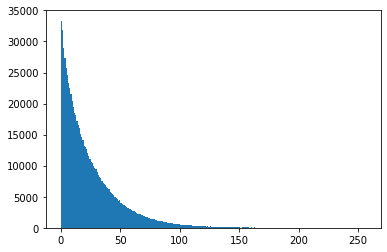

In [32]:
plt.hist(img_lap.ravel(), 256, [0, 256])
plt.show()

In [33]:
img_lap_step = np.zeros(robert.shape)
img_lap_step[img_lap > 10] = 1

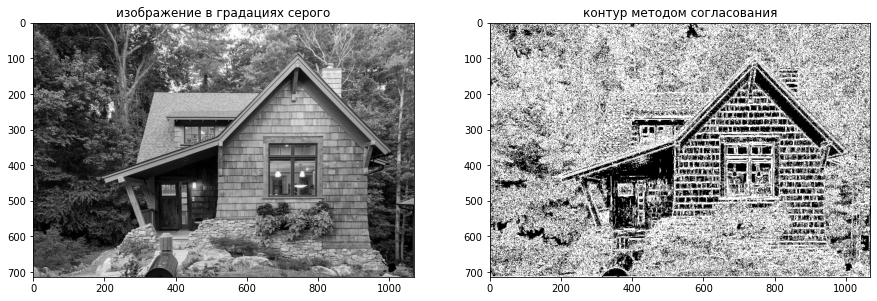

In [34]:
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title("изображение в градациях серого")
plt.imshow(img, cmap='gray')


plt.subplot(1, 2, 2)
plt.title("контур методом согласования")
plt.imshow(img_lap_step, cmap='gray')
plt.show()